In [171]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [172]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [173]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [174]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [175]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [176]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [177]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [178]:
from tqdm.notebook import tqdm

In [179]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [180]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\prera\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [181]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [182]:
x_train = train_features/255.0
x_test = test_features/255.0

In [183]:
from sklearn.preprocessing import LabelEncoder

In [184]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [185]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [186]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [187]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\prera\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [188]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.2385 - loss: 1.8385 - val_accuracy: 0.2632 - val_loss: 1.7992
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.2558 - loss: 1.7920 - val_accuracy: 0.3237 - val_loss: 1.6755
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.3133 - loss: 1.6832 - val_accuracy: 0.3650 - val_loss: 1.5935
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - accuracy: 0.3726 - loss: 1.5723 - val_accuracy: 0.4658 - val_loss: 1.3934
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - accuracy: 0.4258 - loss: 1.4661 - val_accuracy: 0.4744 - val_loss: 1.3557
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1144s 5s/step - accuracy: 0.4469 - loss: 1.4230 - val_accuracy: 0.5068 - val_loss: 1.3024
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.4574 - loss: 1.3911 - val_accuracy: 0.5192 - val_loss: 1.2565
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - accuracy: 0.4818 - loss: 1.3624 -

226/226 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.7349 - loss: 0.7291 - val_accuracy: 0.6323 - val_loss: 1.0476
Epoch 100/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.7312 - loss: 0.7323 - val_accuracy: 0.6302 - val_loss: 1.0648


In [189]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [190]:
from keras.models import model_from_json

In [191]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [192]:
def ef(image):
    img = load_img(image,grayscale = True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [193]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of disgust


C:\Users\prera\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
model prediction is  sad


In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
model prediction is  sad


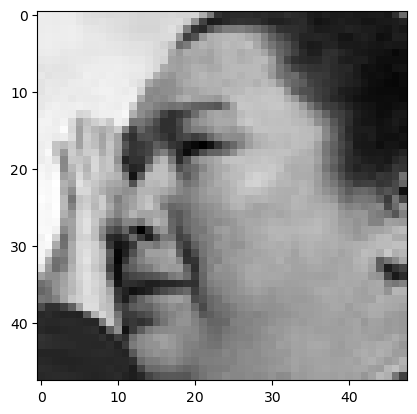

In [199]:
image = 'images/train/sad/430.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  sad


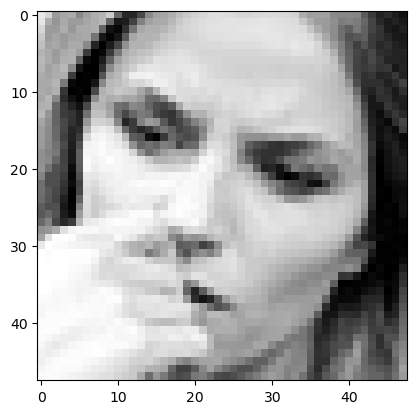

In [196]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  sad


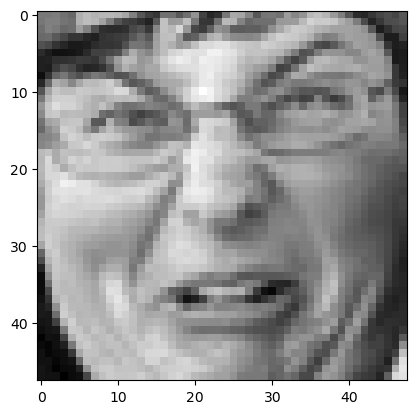

In [197]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  sad


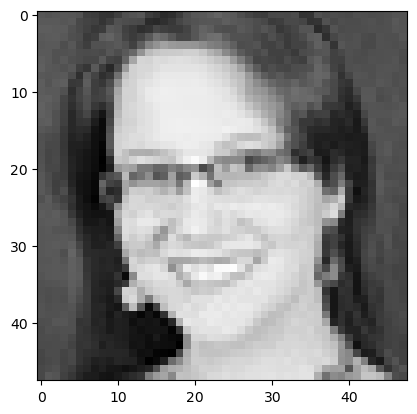

In [198]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  happy


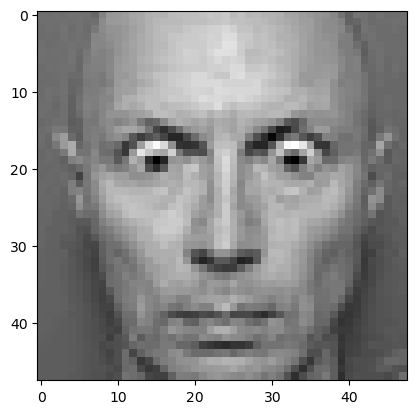

In [144]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [52]:
import numpy as np

# Assuming y_train is one-hot encoded
class_distribution = np.sum(y_train, axis=0)
print("Class distribution in training data:", class_distribution)

Class distribution in training data: [3993.  436. 4103. 7164. 4982. 4938. 3205.]


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Model prediction is disgust


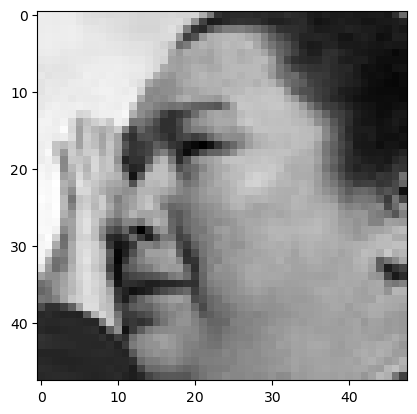

In [112]:
import matplotlib.pyplot as plt
import numpy as np

image = 'images/train/sad/430.jpg'
print("Original image is of sad")

# Function to preprocess the image (ef) and model prediction
img = ef(image)  # Ensure ef correctly preprocesses the image for your model
img = img.reshape(1, 48, 48, 1)  # Assuming the model expects input shape (1, 48, 48, 1)

pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is", pred_label)

# Display the image to check if it's correct
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
model prediction is happy


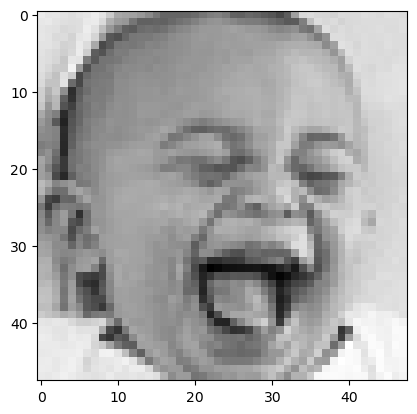

In [200]:
image = 'images/train/happy/57.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is happy")
plt.imshow(img.reshape(48,48),cmap='gray')